# Feature Engineering commodity prices

## coal price

In [1]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Assuming your notebook is in the 'feature_engin' directory,
# and you want to add 'main' to the path
main_dir = os.path.dirname(current_dir)
sys.path.append(main_dir)

from preproc.data import clean_data_coal, clean_data_gas, clean_data_oil
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [2]:
coal_price_df = clean_data_coal()
coal_price_df


Loaded coal_price.csv successfully.


,Date,coal_adj_close
0,2023-11-22,122.75
1,2023-11-21,122.40
2,2023-11-20,121.75
3,2023-11-17,121.75
4,2023-11-16,122.50
...,...,...
1487,NaT,NaN
1488,NaT,NaN
1489,NaT,NaN
1490,NaT,NaN


In [3]:
coal_price_df.shape


(1492, 2)

In [4]:
coal_price_df.size


2984

In [5]:
coal_price_df.dtypes


Date              datetime64[ns]
coal_adj_close           float64
dtype: object

In [6]:
coal_price_df.isnull().sum()


Date               8
coal_adj_close    18
dtype: int64

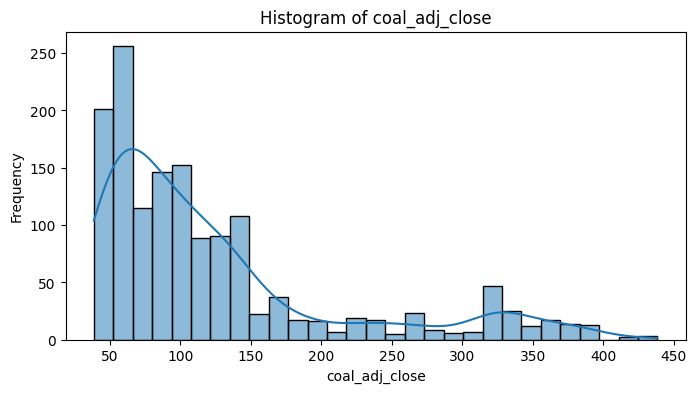

In [7]:
for column in coal_price_df.columns:
    if coal_price_df[column].dtype in ['int64', 'float64']:  # Numeric columns
        plt.figure(figsize=(8, 4))
        sns.histplot(coal_price_df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


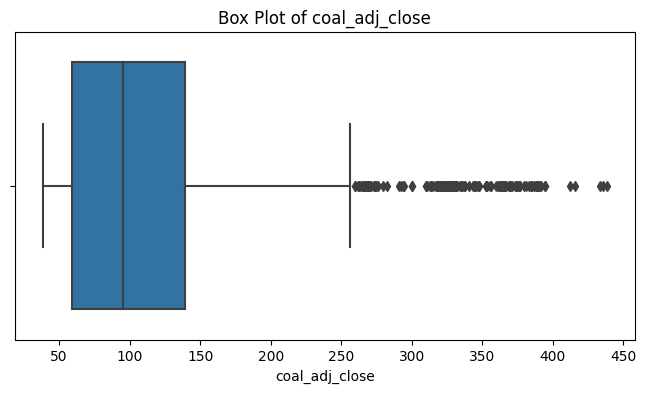

In [8]:
for column in coal_price_df.columns:
    if coal_price_df[column].dtype in ['int64', 'float64']:  # Numeric columns
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=coal_price_df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()


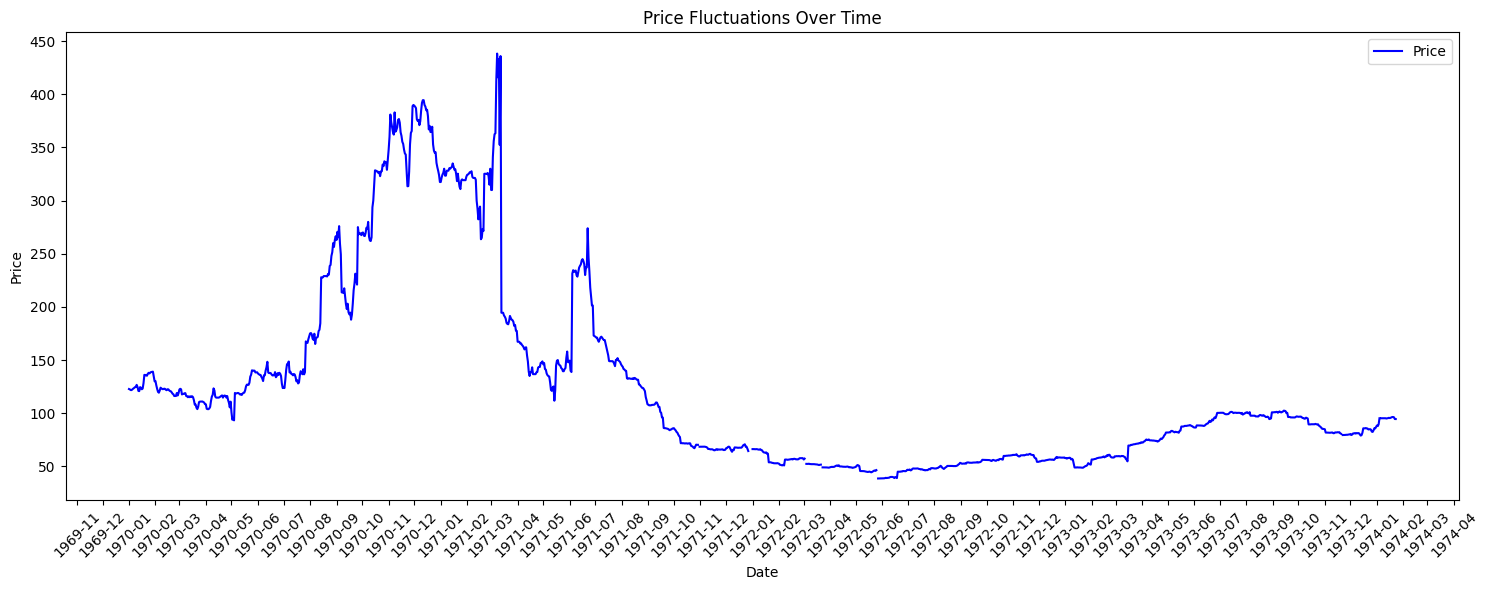

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the raw price data
plt.figure(figsize=(15, 6))
plt.plot(coal_price_df.index, coal_price_df['coal_adj_close'], label='Price', color='blue')  # Ensure using the index for x-axis

# Formatting the x-axis to show months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Formatting as Year-Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # Setting major ticks to months

# Other plot settings
plt.title('Price Fluctuations Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Convert 'Date' to datetime with UTC timezone and add 00:00:00
coal_price_df['Date'] = pd.to_datetime(coal_price_df['Date']).dt.tz_localize('UTC')

# Set 'Date' as the index
coal_price_df.set_index('Date', inplace=True)


In [11]:
coal_price_df


,coal_adj_close
Date,
2023-11-22 00:00:00+00:00,122.75
2023-11-21 00:00:00+00:00,122.40
2023-11-20 00:00:00+00:00,121.75
2023-11-17 00:00:00+00:00,121.75
2023-11-16 00:00:00+00:00,122.50
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [12]:
scaler = MinMaxScaler()

# Reshaping the column to the format expected by MinMaxScaler (2D array)
coal_price_scaled = scaler.fit_transform(coal_price_df[['coal_adj_close']])

# Replace the original column with the scaled values
coal_price_df['coal_adj_close'] = coal_price_scaled


In [13]:
coal_price_df


,coal_adj_close
Date,
2023-11-22 00:00:00+00:00,0.210546
2023-11-21 00:00:00+00:00,0.209671
2023-11-20 00:00:00+00:00,0.208045
2023-11-17 00:00:00+00:00,0.208045
2023-11-16 00:00:00+00:00,0.209921
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [14]:
oil_price_df = clean_data_oil()
oil_price_df


Loaded oil_price.csv successfully.


,Date,oil_adj_close,oil_volume
0,2023-11-22,77.10,389325.0
1,2023-11-21,77.77,238629.0
2,2023-11-20,77.60,270638.0
3,2023-11-17,75.89,101484.0
4,2023-11-16,72.90,125165.0
...,...,...,...
1480,2018-01-05,61.44,563036.0
1481,2018-01-04,62.01,654363.0
1482,2018-01-03,61.63,673859.0
1483,2018-01-02,60.37,510313.0


In [15]:
gas_price_df = clean_data_gas()
gas_price_df


Loaded ttf_price.csv successfully.


,Date,ttf_adj_close,ttf_volume
0,2023-11-22,81.96,40651.0
1,2023-11-21,82.45,22699.0
2,2023-11-20,82.32,24121.0
3,2023-11-17,80.61,35037.0
4,2023-11-16,77.42,37692.0
...,...,...,...
1479,2018-01-08,67.78,17704.0
1480,2018-01-05,67.62,1829.0
1481,2018-01-04,68.07,2284.0
1482,2018-01-03,67.84,25878.0


In [16]:
gas_price_df.dtypes


Date             datetime64[ns]
ttf_adj_close           float64
ttf_volume              float64
dtype: object

In [17]:
gas_price_df


,Date,ttf_adj_close,ttf_volume
0,2023-11-22,81.96,40651.0
1,2023-11-21,82.45,22699.0
2,2023-11-20,82.32,24121.0
3,2023-11-17,80.61,35037.0
4,2023-11-16,77.42,37692.0
...,...,...,...
1479,2018-01-08,67.78,17704.0
1480,2018-01-05,67.62,1829.0
1481,2018-01-04,68.07,2284.0
1482,2018-01-03,67.84,25878.0


In [22]:
coal_price_df.isnull()


,coal_adj_close
Date,
2023-11-22 00:00:00+00:00,False
2023-11-21 00:00:00+00:00,False
2023-11-20 00:00:00+00:00,False
2023-11-17 00:00:00+00:00,False
2023-11-16 00:00:00+00:00,False
...,...
NaT,True
NaT,True
NaT,True


In [26]:
# Remove rows where the index (Date) is NaT
coal_price_df = coal_price_df[coal_price_df.index.notna()]

# Optional: Check again for duplicates
duplicates_after = coal_price_df.index.duplicated(keep=False)
if duplicates_after.any():
    print("Remaining duplicates found")
    print(coal_price_df[coal_price_df.index.duplicated(keep=False)])
else:
    print("No more duplicates")


No more duplicates


In [1]:
from feature_engin import combine_dataframes


In [2]:
combine_dataframes = combine_dataframes()
combine_dataframes


Loaded coal_price.csv successfully.
Loaded ttf_price.csv successfully.
Loaded oil_price.csv successfully.


,coal_adj_close,ttf_adj_close,ttf_volume,oil_adj_close,oil_volume
Date,,,,,
2018-01-02 00:00:00+00:00,0.139880,0.434791,0.027559,0.607451,0.222868
2018-01-02 00:15:00+00:00,0.139880,0.434791,0.027559,0.607451,0.222868
2018-01-02 00:30:00+00:00,0.139880,0.434791,0.027559,0.607451,0.222868
2018-01-02 00:45:00+00:00,0.139880,0.434791,0.027559,0.607451,0.222868
2018-01-02 01:00:00+00:00,0.139880,0.434791,0.027559,0.607451,0.222868
...,...,...,...,...,...
2023-11-21 23:00:00+00:00,0.209671,0.580948,0.260125,0.715304,0.104114
2023-11-21 23:15:00+00:00,0.209671,0.580948,0.260125,0.715304,0.104114
2023-11-21 23:30:00+00:00,0.209671,0.580948,0.260125,0.715304,0.104114
